### *visualize the data*

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
 


In [11]:
import warnings 
warnings.filterwarnings ("ignore")

In [12]:
# import clean dataset
data = pd.read_csv(r"C:\Users\DELL\Notes_and_practice\EDA\cleaned_data.csv")
data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,5
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


### *Uivariate analysis* 

In [17]:
data['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int64

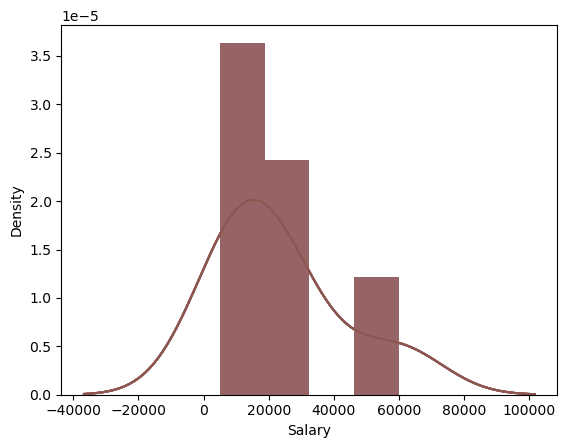

In [16]:
vis1 = sns.distplot(data['Salary'])
vis1
plt.show()


- *this visualize clearly mension or show outlier*

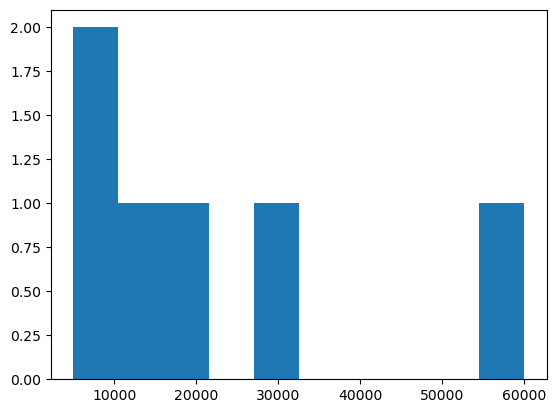

In [18]:
vis2 = plt.hist(data['Salary'])
plt.show()

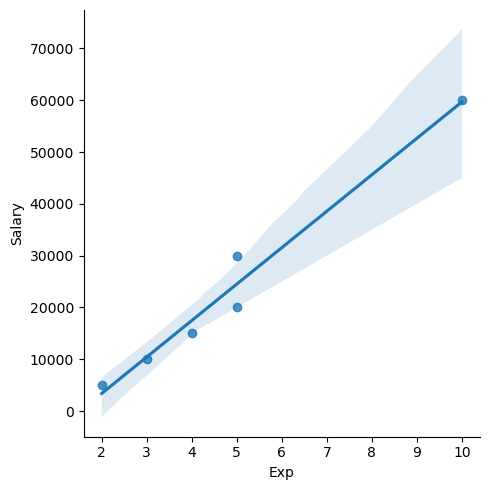

In [19]:
vis3 = sns.lmplot(data=data,x="Exp",y="Salary")
plt.show()

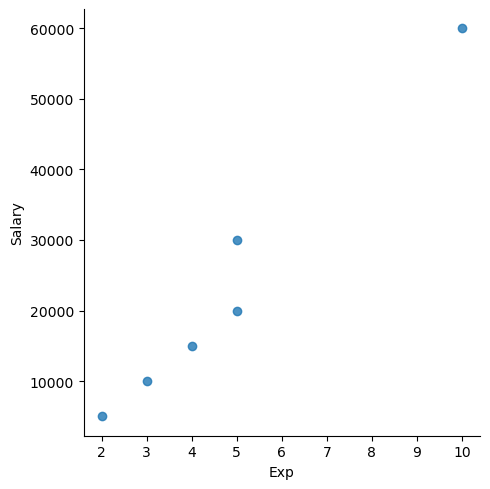

In [20]:
vis3 = sns.lmplot(data=data,x="Exp",y="Salary", fit_reg=False)
plt.show()

In [21]:
data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,5
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


- *choose the dipendent variable and independent varaible in the dataset* 

In [ ]:
# here all independent variable we write x= idv
x_idv = data[["Name", "Domain", "Age", "Location", "Exp"]]
x_idv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,5
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [25]:
# Salary is dependent variable we write y=dv
y_dv = data["Salary"]
y_dv

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int64

### *here we apply all three  imputation or encoding techenique*
- *1. dummy variable*
- *2. lebel encoder*
- *3.ONE HOT encoder*


- *1.dummy varaible*

In [27]:
# dummy varaible 
imputations = pd.get_dummies(data, dtype=int)
imputations

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [29]:
len(imputations.columns)

19

In [30]:
imputations.columns

Index(['Age', 'Salary', 'Exp', 'Name_Jane', 'Name_Kim', 'Name_Mike',
       'Name_Teddy', 'Name_Umar', 'Name_Uttam', 'Domain_Analytics',
       'Domain_Dataanalyst', 'Domain_Datascience', 'Domain_NLP',
       'Domain_Statistics', 'Domain_Testing', 'Location_Bangalore',
       'Location_Delhi', 'Location_Hyderbad', 'Location_Mumbai'],
      dtype='object')

- *2. leble encoder*

In [32]:
from sklearn.preprocessing  import LabelEncoder
le = LabelEncoder()

In [ ]:
# we apply for loop and imputation or transform  categorical to numerical (use lebel encoder)
for col in data.columns:
    if data[col].dtype == 'object':   
        data[col] = le.fit_transform(data[col])

In [35]:
print(data)

   Name  Domain  Age  Location  Salary  Exp
0     2       2   34         3    5000    2
1     3       5   45         0   10000    3
2     4       1   50         0   15000    4
3     0       0   50         2   20000    5
4     5       4   67         0   30000    5
5     1       3   55         1   60000   10


- *3. ONEHOT encoder* 

In [40]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
encoded_data = ohe.fit_transform(data)

In [ ]:
# 
encoded_data = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(data.columns))


In [42]:
print(encoded_data)

   Name_0  Name_1  Name_2  Name_3  Name_4  Name_5  Domain_0  Domain_1  \
0     0.0     0.0     1.0     0.0     0.0     0.0       0.0       0.0   
1     0.0     0.0     0.0     1.0     0.0     0.0       0.0       0.0   
2     0.0     0.0     0.0     0.0     1.0     0.0       0.0       1.0   
3     1.0     0.0     0.0     0.0     0.0     0.0       1.0       0.0   
4     0.0     0.0     0.0     0.0     0.0     1.0       0.0       0.0   
5     0.0     1.0     0.0     0.0     0.0     0.0       0.0       0.0   

   Domain_2  Domain_3  ...  Salary_10000  Salary_15000  Salary_20000  \
0       1.0       0.0  ...           0.0           0.0           0.0   
1       0.0       0.0  ...           1.0           0.0           0.0   
2       0.0       0.0  ...           0.0           1.0           0.0   
3       0.0       0.0  ...           0.0           0.0           1.0   
4       0.0       0.0  ...           0.0           0.0           0.0   
5       0.0       1.0  ...           0.0           0.0  

### *completed EDA part* 